In [14]:
import pandas as pd
import numpy as np
import mne
import pickle 
from pickle import dump
from mne.io import  read_raw_edf
import matplotlib.pyplot as plt
import seaborn as sns
from source import data_import
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import joblib
import tempfile
import os
from source.constants import CHANNELS, FREQUENCY_RANGES
import scipy
from scipy.signal import butter, lfilter

In [34]:
df = data_import.load_pyarrow(file_name="feature_extracted ")

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/feature_extracted .arrow was loaded.


In [35]:
df.head()

,seizure_id,segment_id,is_seizure,F4-C4_std,F4-C4_var,F4-C4_mean,F4-C4_abs_mean,F4-C4_delta,F4-C4_theta,F4-C4_gamma,...,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_std,CZ-PZ_var,CZ-PZ_mean,CZ-PZ_abs_mean,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,0,0,False,26.608636,708.019529,0.023863,19.505481,99.563890,26.281879,0.551555,...,346.084315,64.842219,8.286583,29.122383,848.113174,2.203434,20.289365,137.834177,37.725855,0.255758
1,0,1,False,25.884854,670.025660,-0.139982,18.224443,101.516124,24.805891,0.549208,...,142.811834,54.132612,12.542004,27.997680,783.870065,-1.106477,19.785279,114.492765,35.674094,0.309405
2,0,2,False,21.037686,442.584228,0.631048,15.457515,69.388422,14.019323,0.473173,...,739.054151,65.174735,4.685447,23.147740,535.817871,-1.023719,18.166435,81.360188,21.100725,0.254085
3,0,3,False,24.740861,612.110181,-0.149270,17.969433,101.927819,19.748344,0.569984,...,869.540612,96.307576,7.998007,28.321972,802.134118,1.266842,21.061472,117.478709,23.682498,0.305565
4,0,4,False,24.711581,610.662235,0.056478,18.635458,78.193766,18.391775,0.696673,...,496.665690,113.406518,7.170648,22.775900,518.741632,1.082338,18.012052,63.030117,27.597611,0.314608


In [37]:
y = df["is_seizure"]
X = df.drop(columns=["seizure_id", "is_seizure","segment_id" ])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
model_path = "Class_models/best_xgboost_model.pkl"  
loaded_model=joblib.load(model_path)


In [40]:
loaded_model=joblib.load(model_path)

In [41]:

# Perform classification using the loaded model
predictions = loaded_model.predict(X_test) 


In [42]:
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[294   4]
 [  6 161]]


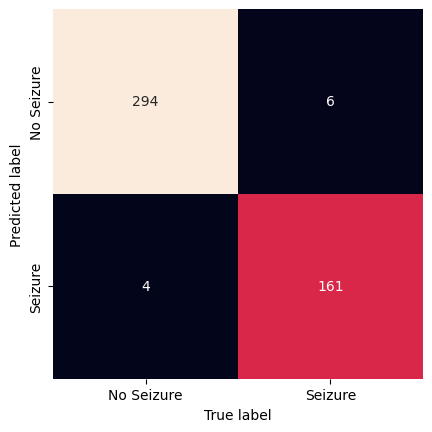

In [43]:
labels = ['No Seizure', 'Seizure']
mat = confusion.T  # Transpose to match your reference code
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('True label')
plt.ylabel('Predicted label')
#plt.title(f'Confusion Matrix for {XG boost}')
plt.show()
print()

In [45]:
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       298
        True       0.98      0.96      0.97       167

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

